In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [4]:
X_train[0].shape

(28, 28)

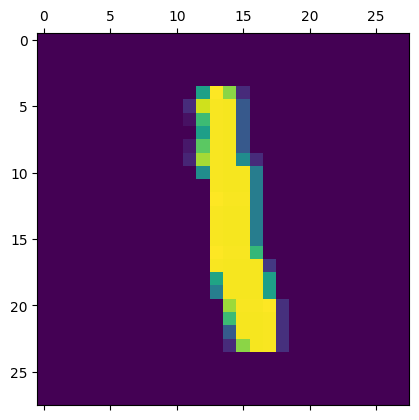

In [7]:
plt.matshow(X_train[6])

In [8]:
# normalize
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# flatter
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 560us/step - loss: 0.4660 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 1s 560us/step - loss: 0.3032 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 1s 556us/step - loss: 0.2828 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 1s 546us/step - loss: 0.2729 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 546us/step - loss: 0.2664 - accuracy: 0.9256


In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 518us/step - loss: 0.2702 - accuracy: 0.9247


[0.2701686918735504, 0.9247000217437744]

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 452us/step


array([2.9213378e-02, 3.1251980e-07, 7.0749357e-02, 9.6808392e-01,
       4.2049331e-03, 1.2756704e-01, 3.0709646e-06, 9.9978912e-01,
       1.2791339e-01, 7.6240104e-01], dtype=float32)

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

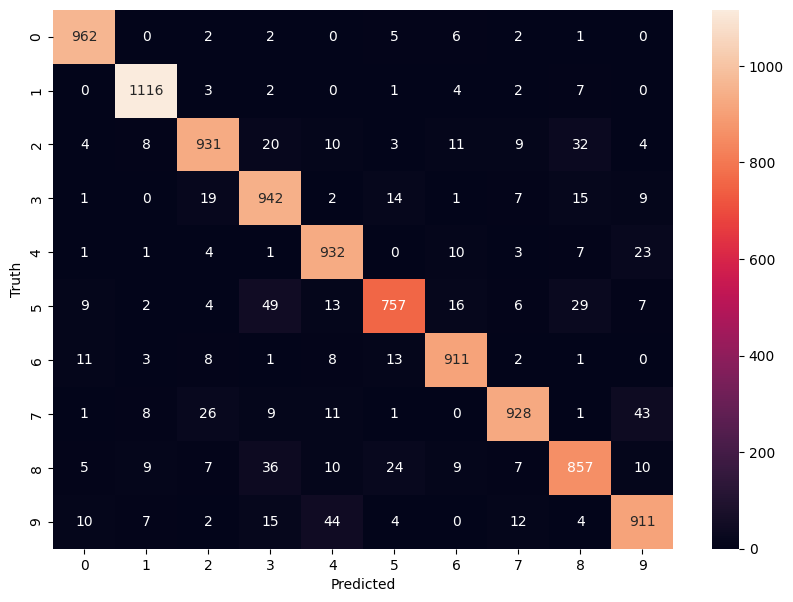

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Hidden Layer